# IE 7300 Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import math
from dataclasses import dataclass
from scipy import optimize
from svm_utils  import *
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline

In [2]:
onp = pd.read_csv('OnlineNewsPopularity.csv')
onp.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
onp.shape

(39644, 61)

In [4]:
onp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
onp.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
onp.columns=onp.columns.str.replace(" ","")

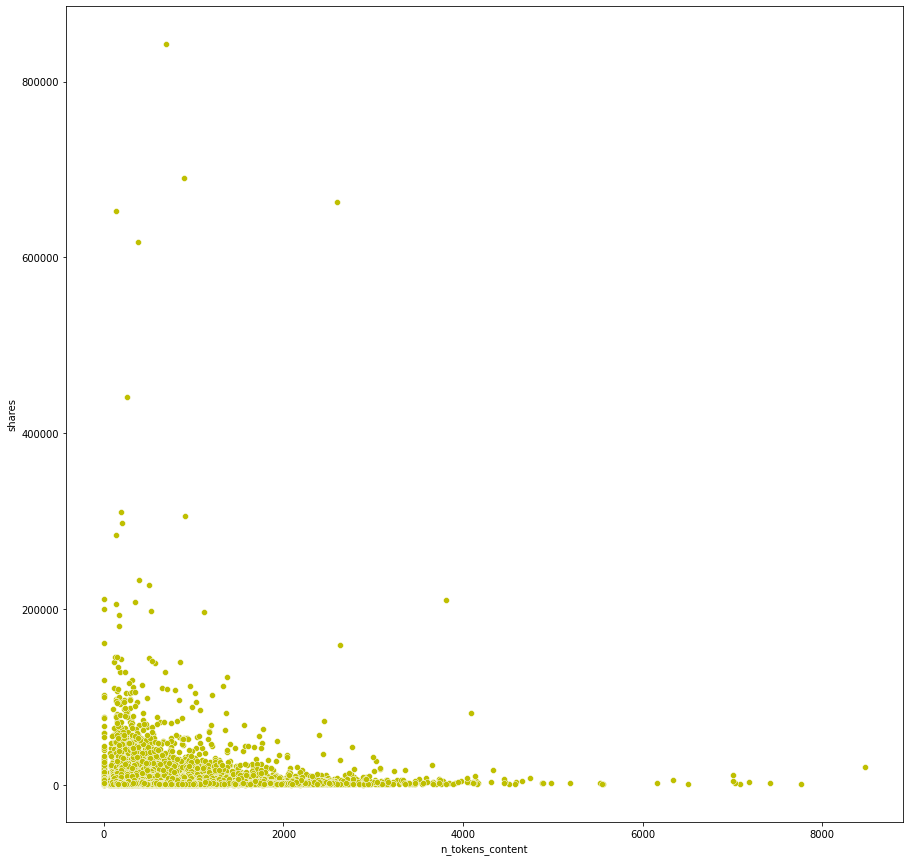

In [7]:
plt.figure(figsize=(15, 15))                 #Checking if the number of words affect the number of shares
shares_plot = sns.scatterplot(y='shares', x='n_tokens_content', data=onp, color='y')

In [8]:
average_shares = onp['shares'].median()
weekdays = onp.columns.values[31:38]
print(weekdays)

['weekday_is_monday' 'weekday_is_tuesday' 'weekday_is_wednesday'
 'weekday_is_thursday' 'weekday_is_friday' 'weekday_is_saturday'
 'weekday_is_sunday']


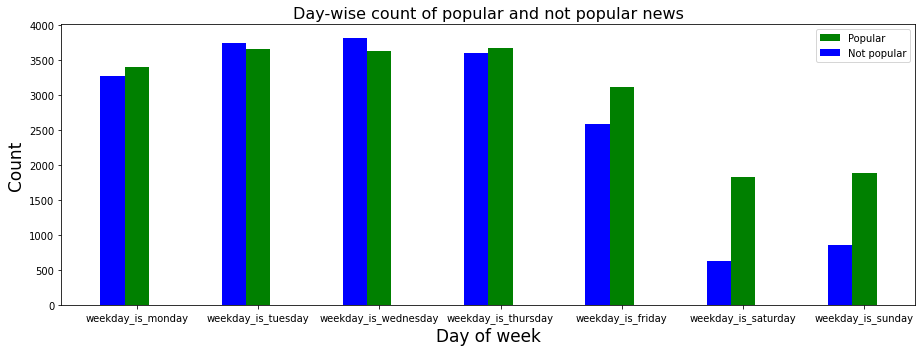

In [9]:
not_popular = onp[onp['shares']<average_shares]
popular = onp[onp['shares']>=average_shares]

not_popular_day = not_popular[weekdays].sum().values
popular_day = popular[weekdays].sum().values

fig = plt.figure(figsize = (13, 5))
plt.title('Day-wise count of popular and not popular news', fontsize=16)

plt.bar(np.arange(len(weekdays)), popular_day, width=0.2, align='center', color='g', label='Popular')
plt.bar(np.arange(len(weekdays))-0.2, not_popular_day, width=0.2, align='center', color='b', label='Not popular')

plt.xticks(np.arange(len(weekdays)), weekdays)
plt.xlabel('Day of week', fontsize=17)
plt.ylabel('Count', fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [10]:
word_sentiment = onp.columns.values[48:50]
print(word_sentiment)

['rate_positive_words' 'rate_negative_words']


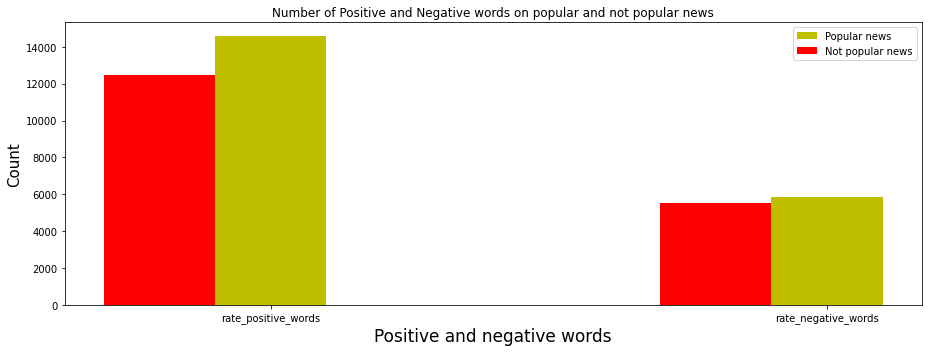

In [11]:
not_popular_senti = not_popular[word_sentiment].sum().values
popular_senti = popular[word_sentiment].sum().values

fig = plt.figure(figsize=(13, 5))
plt.title('Number of Positive and Negative words on popular and not popular news')

plt.bar(np.arange(len(word_sentiment)), popular_senti, width=0.2, align='center', color='y', label='Popular news')
plt.bar(np.arange(len(word_sentiment))-0.2, not_popular_senti, width=0.2, align='center', color='r', label='Not popular news')

plt.xticks(np.arange(len(word_sentiment)),word_sentiment)
plt.xlabel('Positive and negative words', fontsize=17)
plt.ylabel('Count', fontsize=15)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

C:\Users\amool\AppData\Local\Temp/ipykernel_14352/907910737.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onp1 = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot:>

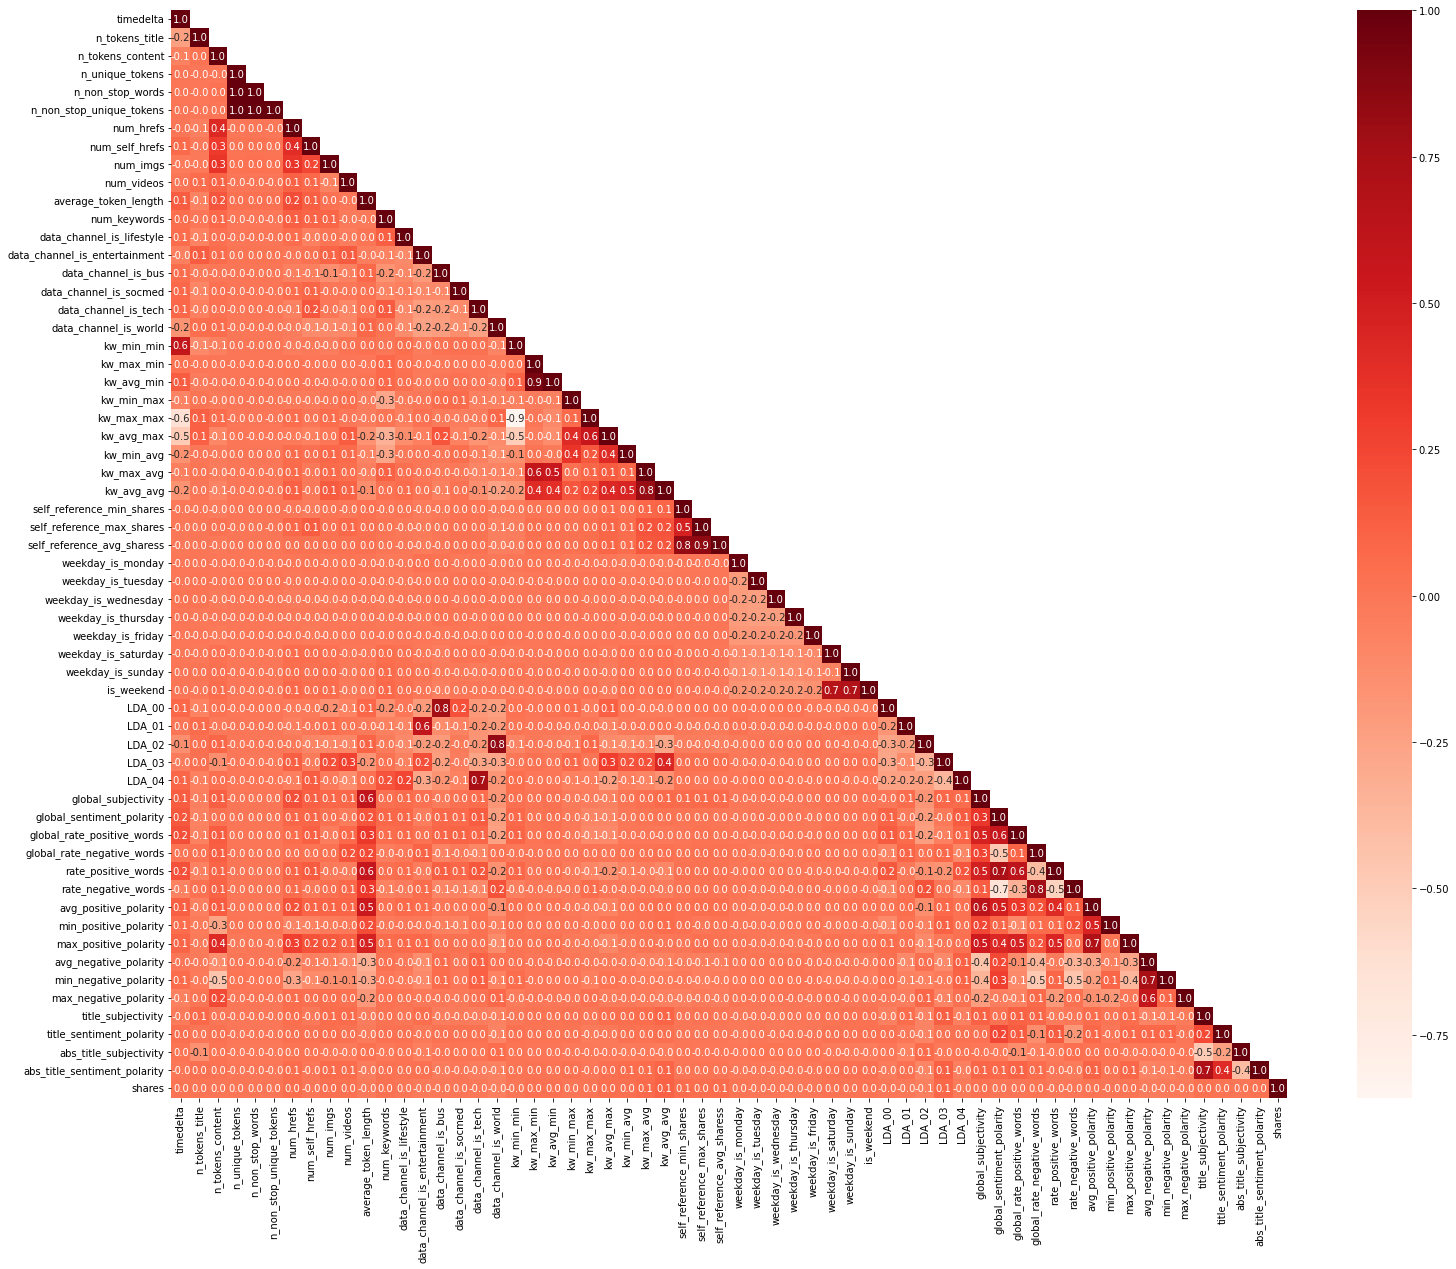

In [12]:
cor=onp.corr()
plt.figure(figsize=(25,20))
onp1 = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(onp1,cmap='Reds', annot=True, fmt=".1f")

In [13]:
# Dropping:
# 'URL' as it is a non-numeric attribute and is not valuable to our analysis 
# 'timedelta' as it is not a feature, but a non-predictive attribute
# 'n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min' , 'kw_max_max', 'self_reference_avg_sharess' as they are highly correlated attributes
onp= onp.drop(["url","timedelta","n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min", "kw_max_max", "self_reference_avg_sharess"],axis=1)

<AxesSubplot:>

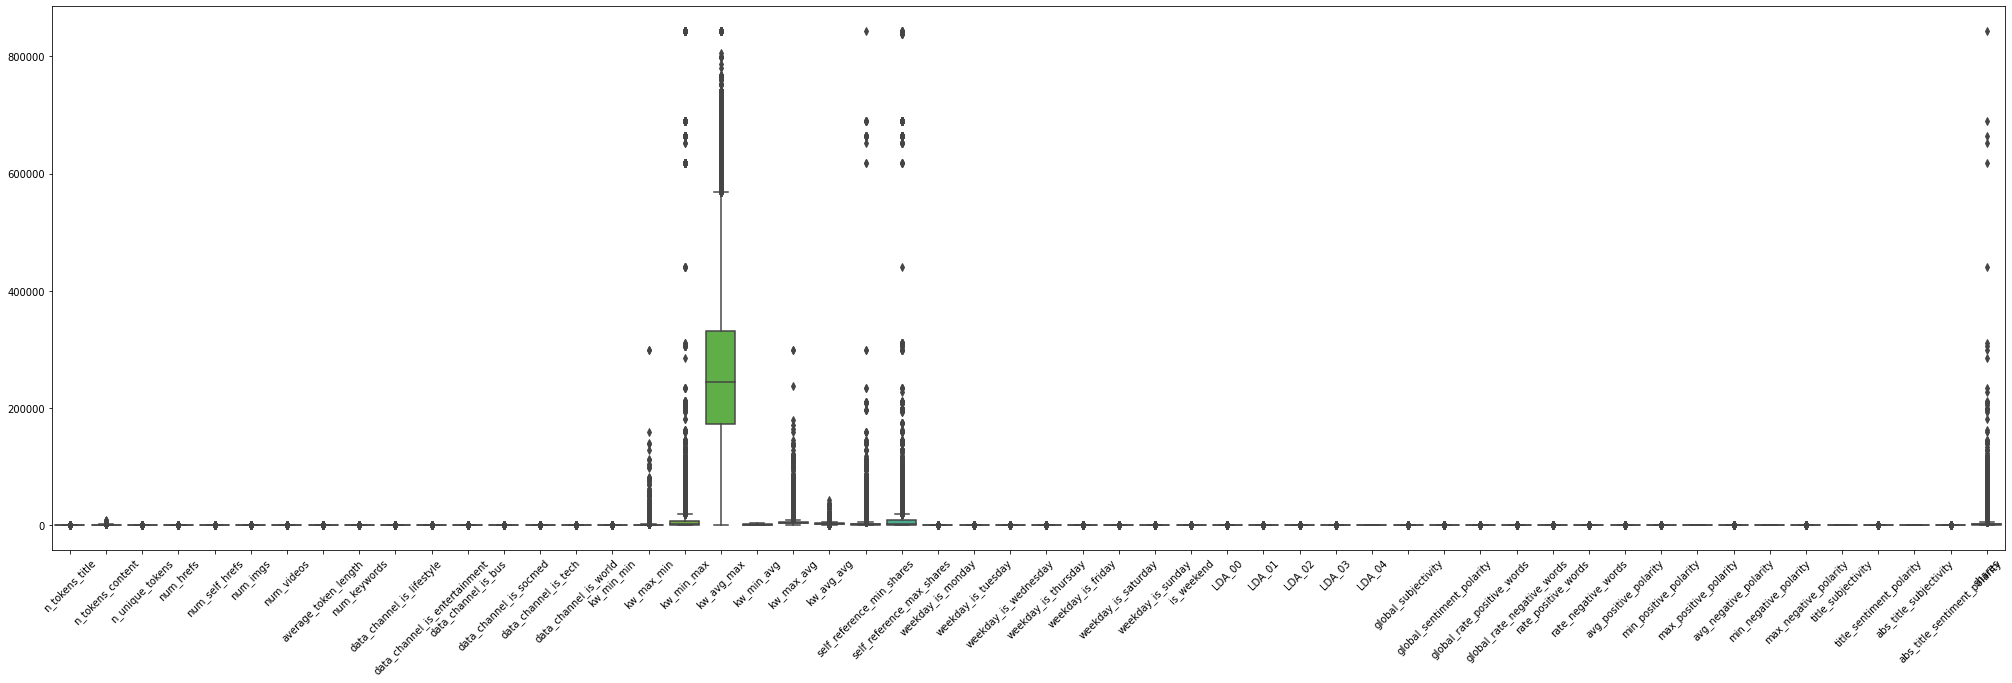

In [14]:
#numerical = onp.select_dtypes(['int64','float64']).columns
plt.figure(figsize=(35,10))
plt.xticks(rotation=45)
sns.boxplot(data = onp)

In [15]:
numerical_onp = onp.drop(["data_channel_is_tech","data_channel_is_world","data_channel_is_lifestyle",
                          "data_channel_is_entertainment","data_channel_is_bus", "data_channel_is_socmed", 
                          "is_weekend", "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday",
                          "weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday"],axis=1)

categorical_onp = onp[["data_channel_is_tech","data_channel_is_world","data_channel_is_lifestyle",
                       "data_channel_is_entertainment","data_channel_is_bus", "data_channel_is_socmed", 
                       "is_weekend", "weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday",
                       "weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday"]]

In [16]:
numerical_onp = numerical_onp.drop('shares',axis=1)

In [17]:
negative_columns = numerical_onp.columns[(numerical_onp<=0).any()]
negative_columns

Index(['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [18]:
#The distribution has a lot of negative values and isn't normal, so will be using box-cox method of scaling 
for i in negative_columns:                   #new features are created by converting negative into positive values
    minimum = numerical_onp[i].min()
    new_name = i +'_1'
    numerical_onp[new_name] = ((numerical_onp[i]+1) - minimum)

In [19]:
numerical_onp.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_avg_max',
       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'n_tokens_content_1',
       'n_unique_tokens_1', 'num_hrefs_1', 'num_self_hrefs_1', 'num_imgs_1',
       'num_videos_1', 'average_to

In [20]:
for i in negative_columns:
    numerical_onp.drop(i,axis=1,inplace=True) #Dropped old negative columns

In [21]:
negative_columns = numerical_onp.columns[(numerical_onp<=0).any()]
negative_columns

Index([], dtype='object')

In [22]:
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
numerical_onp1=pt.fit_transform(numerical_onp)
numerical_onp1=(pd.DataFrame(numerical_onp1,columns=numerical_onp.columns))

In [23]:
ss = StandardScaler()
numerical_onp[:] = ss.fit_transform(numerical_onp)

In [24]:
def remove_outliers(array, k=1):
    ll = array.mean() - k*array.std()
    ul = array.mean() + k*array.std()
    array[array < ll] = ll
    array[array > ul] = ul
    return array

In [25]:
numerical_onp = numerical_onp.apply(remove_outliers)

<AxesSubplot:>

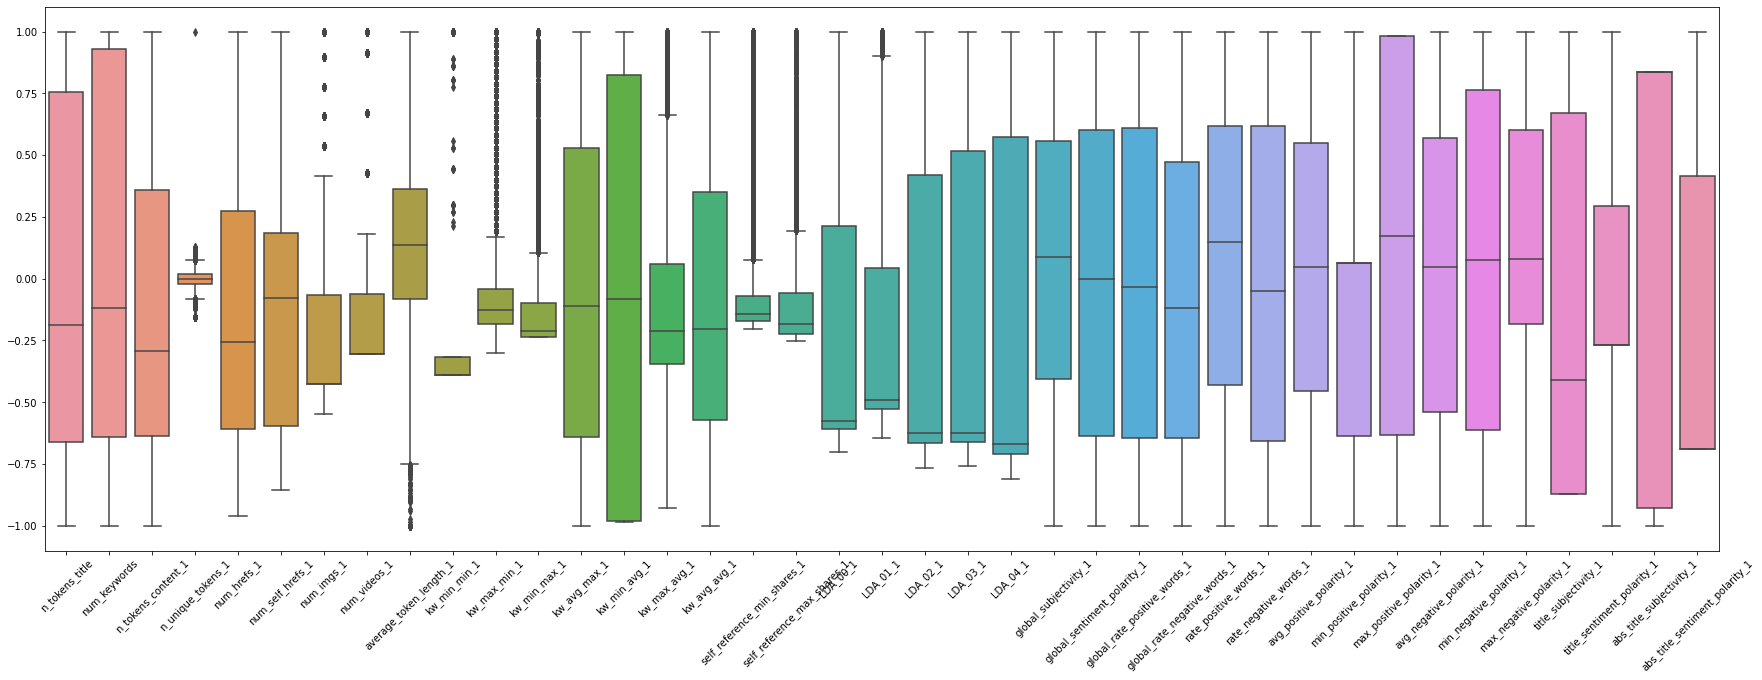

In [26]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
sns.boxplot(data = numerical_onp)

In [27]:
categorical_onp.columns

Index(['data_channel_is_tech', 'data_channel_is_world',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'is_weekend',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'],
      dtype='object')

In [28]:
numerical_onp.columns

Index(['n_tokens_title', 'num_keywords', 'n_tokens_content_1',
       'n_unique_tokens_1', 'num_hrefs_1', 'num_self_hrefs_1', 'num_imgs_1',
       'num_videos_1', 'average_token_length_1', 'kw_min_min_1',
       'kw_max_min_1', 'kw_min_max_1', 'kw_avg_max_1', 'kw_min_avg_1',
       'kw_max_avg_1', 'kw_avg_avg_1', 'self_reference_min_shares_1',
       'self_reference_max_shares_1', 'LDA_00_1', 'LDA_01_1', 'LDA_02_1',
       'LDA_03_1', 'LDA_04_1', 'global_subjectivity_1',
       'global_sentiment_polarity_1', 'global_rate_positive_words_1',
       'global_rate_negative_words_1', 'rate_positive_words_1',
       'rate_negative_words_1', 'avg_positive_polarity_1',
       'min_positive_polarity_1', 'max_positive_polarity_1',
       'avg_negative_polarity_1', 'min_negative_polarity_1',
       'max_negative_polarity_1', 'title_subjectivity_1',
       'title_sentiment_polarity_1', 'abs_title_subjectivity_1',
       'abs_title_sentiment_polarity_1'],
      dtype='object')

In [29]:
final_onp=pd.concat([numerical_onp,categorical_onp],axis=1)

In [30]:
median = onp['shares'].median()

In [31]:
final_onp['popularity'] = onp['shares'].apply(lambda x: 0 if x < median else 1)

In [32]:
final_onp.shape

(39644, 54)

In [33]:
final_onp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   n_tokens_title                  39644 non-null  float64
 1   num_keywords                    39644 non-null  float64
 2   n_tokens_content_1              39644 non-null  float64
 3   n_unique_tokens_1               39644 non-null  float64
 4   num_hrefs_1                     39644 non-null  float64
 5   num_self_hrefs_1                39644 non-null  float64
 6   num_imgs_1                      39644 non-null  float64
 7   num_videos_1                    39644 non-null  float64
 8   average_token_length_1          39644 non-null  float64
 9   kw_min_min_1                    39644 non-null  float64
 10  kw_max_min_1                    39644 non-null  float64
 11  kw_min_max_1                    39644 non-null  float64
 12  kw_avg_max_1                    

In [34]:
X = final_onp.drop(['popularity'], axis = 1)
y = final_onp['popularity']

In [35]:
class LogisticRegression:
    
    def __init__(self, X, y, learningRate, tolerance, maxIteration, batchSize):
        
        self.X= X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.batchSize = batchSize
        
        
    def splitData(self):
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        X_train = self.add_X0(X_train)
        X_valid = self.add_X0(X_valid)
        X_test = self.add_X0(X_test)
        return X_train, X_valid, X_test, y_train, y_valid, y_test

    
    # Normalizing the training dataset using Z-score
#     def normalize(self, X):
#         mean = np.mean(X, 0)
#         std = np.std(X, 0)
        
#         X_norm = (X-mean) / std
#         X_norm = self.add_X0(X_norm)
#         return X_norm, mean, std
    
    
#     def normalizeTestData(self, X, train_mean, train_std):
#         X_norm = (X - train_mean) / train_std
#         X_norm = self.add_X0(X_norm)
#         return X_norm
    
    
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
        
    def sigmoid(self,z):
        sig = 1 / ( 1 + np.exp(-z))
        return sig
    
    def predict(self,X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
    
    def costFunction(self, X, y):
        pred =np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost = pred.sum( )
        return cost
    
    def gradient(self,X,y):
        sig = self.sigmoid(X.dot(self.w))
        # sig = self.sigmoid(self.predict(X))
        grad = (sig -y ).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in range(self.maxIteration):
            self.w = self.w - self.learningRate*self.gradient(X,y)
            curr = self.costFunction(X,y)
            
            diff = last - curr
            #last - curr
            last = curr
            
            errors.append(curr)
            
            if diff < self.tolerance:
                print("The model stopped Learning")
                break
        # self.plot_cost(errors)

    def stochasticGD(self, X, y):
        X, y = np.array(X, dtype=np.float64), np.array(y, dtype=np.float64)
        XY = np.c_[X.reshape(X.shape[0], X.shape[1]), y.reshape(X.shape[0], 1)]
        
        
        # Set seed
        np.random.seed(2022)
        errors = []
        
        for i in tqdm(range(self.maxIteration)):
                    
        # Shuffle x and y
            np.random.shuffle(XY)

            start = 0
            stop = start + self.batchSize
            X_batch, y_batch = XY[start:stop, :-1], XY[start:stop, -1]

          
            last_error = float('inf')

          # Recalculating the difference
            self.w = self.w - self.learningRate * self.gradient(X_batch, y_batch)
            current_error = self.costFunction(X, y)
         
            diff = last_error - current_error
            last_error = current_error

            errors.append(current_error)
            if np.abs(diff) < self.tolerance:
                print('Model stopped learning')
                break
        
        print(self.w)
        
        
    def evaluate(self, y, y_hat):
        
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        #accuracy = np.sum(np.equal(y_true, y_hat)) / len(y_true)
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        
        return accuracy, precision, recall
    
    def fit(self):

        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        self.w = np.dot(np.ones(X_train.shape[1], dtype = np.float64), 0)
        self.stochasticGD(X_train, y_train)
        # self.gradientDescent(X_train, y_train)
        y_hat_train = self.predict(X_train)
        accuracy, precision, recall = self.evaluate(y_train,y_hat_train)
        return accuracy, precision, recall
        
    def validation(self):
        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        y_hat_valid = self.predict(X_valid)

        accuracy, precision, recall  = self.evaluate(y_valid, y_hat_valid)
        return accuracy, precision, recall

    def test(self):
        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        y_hat_test = self.predict(X_test)
        accuracy, precision, recall  = self.evaluate(y_test, y_hat_test)
        return accuracy, precision, recall        

In [36]:
lr = LogisticRegression(X, y, learningRate = 0.001, tolerance = 0.001, maxIteration = 1000, batchSize=128)
log_base_train_acc = lr.fit()
log_base_valid_acc = lr.validation()
log_base_test_acc = lr.test()
display(log_base_train_acc, log_base_valid_acc, log_base_test_acc)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 31.16it/s]


[ 0.3544723   0.02665062  0.01225379  0.07457299 -0.04707041  0.16818685
 -0.07859104  0.11797312  0.07350505 -0.17561315  0.4186461  -0.0258982
 -0.00535093 -0.13008435 -0.10446963  0.03821286  0.72979087  0.60919695
  0.30948334  0.24558251 -0.13769889 -0.11425736 -0.05162939  0.11443859
  0.17528154  0.05394229 -0.03968682 -0.01981222  0.00191037 -0.06989896
 -0.06888047 -0.14742778 -0.00988499  0.05869707  0.03764346 -0.05214035
  0.07643493  0.08759192  0.08609279  0.02723896  0.4941575  -0.12273086
 -0.14970415 -0.36149849 -0.10010661  0.54089614  0.57442884 -0.03632851
 -0.14481257 -0.16191125 -0.01709061  0.14018639  0.37847831  0.19595052]


(0.6572972972972972, 0.6704715421553964, 0.7133763296758523)

(0.6495495495495496, 0.6496440730424017, 0.7208104395604396)

(0.6488145283336136, 0.6542815674891147, 0.7152149769950817)

In [ ]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000, random_state=1))

In [ ]:
param_range = [0.001, 0.05, 0.1, 0.5, 1.0, 10.0]

In [ ]:
train_scores, test_scores = validation_curve(estimator=lr,
                                             X=X, y=y,
                                             cv=10, scoring="accuracy", 
param_name='logisticregression__C', param_range=param_range)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

In [ ]:
plt.plot(param_range, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [ ]:
from mlxtend.evaluate import bias_variance_decomp
# estimating the bias and variance
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(lr, X_train,
                                                            y_train, X_test,
                                                            y_test,
                                                            loss='mse',
                                                            num_rounds=50,
                                                            random_seed=20)
 
# summary of the results
print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

In [ ]:
class MaxMarginClassifier:
    
    def __init__(self, X, y, C):
        
        self.X = X
        self.y = y
        self.alpha = None
        self.w = None
        self.C = C 
    
    
    def splitData(self):
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        return X_train, X_test, y_train, y_test
    
    
    def fit(self):
        
        X_train, X_test, y_train, y_test = self.splitData()
        N = len(y_train)
        #Gram matrix
        Xy = X_train*y_train[:, np.newaxis] # newmatrix converts a vector into matrix
        GramXy = np.matmul(Xy, Xy.T)
        
        
        def Ld0(G, alpha):
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
            return obj_fn
        
        def partialDerivativeLd0(G, alpha):
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der
    
        #initialize x0 = alphas
          
        alpha = np.ones(N)
        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))

        constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a,y), 'jac': lambda a:y},
                       {'type': 'ineq', 'fun': lambda a: b-np.dot(A,a), 'jac': lambda a:-A})




        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                   x0 = alpha,
                                   jac = lambda a: -partialDerivativeLd0(GramXy, a),
                                   constraints = constraints
                                   )

        self.alpha = optRes.x

        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 1e-4    
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]

        b = []
        for i in range(len(self.supportLabels)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)
        self.b = sum(b)/len(b)

In [ ]:
model = MaxMarginClassifier(X, y, C = 5)

In [ ]:
model.fit()

In [ ]:
a = np.zeros((55500, 27750), dtype='uint8')
a.nbytes

In [ ]:
model.w

In [ ]:
model.b

In [ ]:
fig, ax = plt.subplots(1, figsize = (12,7))
plotSvm(xTrain, yTrain, model.supportVectors, model.w, model.b, label = 'training', ax = ax)

In [ ]:
from sklearn.model_selection import validation_curve

degrees = np.arange(1, 21)

#model = make_pipeline(PolynomialFeatures(), LinearRegression())

# The parameter to vary is the "degrees" on the pipeline step
# "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                 lr, X, y,
                 param_name='polynomialfeatures__degree',
                 param_range=degrees)

# Plot the mean train error and validation error across folds
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2,
         label='cross-validation')
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label='training')

plt.legend(loc='best')
plt.xlabel('degree of fit')
plt.ylabel('explained variance')
plt.title('Validation curve')
plt.tight_layout()

In [ ]:
#from sklearn import preprocessing
#pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
#numerical_onp[:]=pt.fit_transform(numerical_onp)
#numerical_onp1=(pd.DataFrame(numerical_onp1,columns=numerical_onp.columns))

In [ ]:
numerical_onp.hist(figsize=(30,30))
plt.show()